# Exploratory Data Analysis

Objective:
Understand the structure, quality and main patterns of the wine dataset.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/raw/wines_raw.csv")

C:\Users\56954\AppData\Local\Temp\ipykernel_12296\757903918.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/wines_raw.csv")


In [8]:
df.shape

(17831, 61)

In [9]:
df.columns

Index(['id', 'name', 'sku', 'slug', 'created_at', 'updated_at', 'id_cav',
       'vina', 'marca', 'cepa', 'mezcla', 'cosecha', 'valle', 'tipo',
       'puntaje', 'nota_cata', 'grados', 'frescor', 'cuerpo', 'dulzor',
       'astringencia', 'precio', 'm_carnesrojas', 'm_aves', 'm_quesos',
       'm_carnescaza', 'm_pescados', 'm_comidachilena', 'm_cerdo', 'm_cordero',
       'm_pasta', 'm_crustaceos', 'm_mariscos', 'm_comidaoriental', 'formato',
       'codbarra', 'linea', 'foto', 'publica', 'image', 'fecha_cata',
       'is_featured', 'is_best_value', 'is_recommended', 'precio_socio',
       'deleted_at', 'cav_updated_at', 'needs_algolia_update',
       'removed_from_algolia', 'm_postres', 'guarda', 'mdc', 'stock',
       'store_product', 'objectID', '_highlightResult', 'agotado', 'family',
       'procedencia', 'format', 'wine_type'],
      dtype='object')

In [11]:
df.dtypes.value_counts()

int64      25
object     22
float64    14
Name: count, dtype: int64

In [7]:
df.head(3)

,id,name,sku,slug,created_at,updated_at,id_cav,vina,marca,cepa,...,mdc,stock,store_product,objectID,_highlightResult,agotado,family,procedencia,format,wine_type
0,15099,Undurraga altazor 2020,NaN,undurraga-altazor-2020,2024-01-04T15:23:41.000000Z,2025-12-01T19:53:20.000000Z,18179,Undurraga,Altazor,Sin Informacion,...,RECOMENDADOS,0.0,NaN,15099,"{'name': {'value': 'Undurraga altazor 2020', '...",NaN,NaN,NaN,NaN,NaN
1,13651,Undurraga altazor 2017,NaN,undurraga-altazor-2017,2021-12-09T13:44:21.000000Z,2025-12-01T19:52:18.000000Z,16296,Undurraga,Altazor,Sin Informacion,...,RECOMENDADOS,0.0,NaN,13651,"{'name': {'value': 'Undurraga altazor 2017', '...",NaN,NaN,NaN,NaN,NaN
2,11213,Undurraga altazor 2016,28080.0,undurraga-altazor-2016,2019-11-14T16:37:18.000000Z,2025-12-01T19:51:59.000000Z,13703,Undurraga,Altazor,Sin Informacion,...,ICONO,0.0,"{'id': 12245, 'cepa_id': 199, 'family_id': 40,...",11213,"{'name': {'value': 'Undurraga altazor 2016', '...",NaN,NaN,NaN,NaN,NaN


 Null values percentage

In [45]:
(100*df.isnull().sum()/len(df)).sort_values(ascending=False).head(15)

deleted_at        100.000000
family            100.000000
procedencia       100.000000
format            100.000000
wine_type         100.000000
agotado            99.349448
is_recommended     98.227806
is_featured        98.227806
is_best_value      98.227806
store_product      86.220627
sku                86.125287
codbarra           62.952162
mdc                49.929897
precio_socio       45.589143
cosecha             7.021479
dtype: float64

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df["name"].duplicated().sum()

np.int64(1317)

Wrong or suspicious of be wrong prices

In [71]:
(df["precio"] < 3000).sum()

np.int64(153)

In [88]:
df[["precio","puntaje"]].median()

precio     9800.0
puntaje      90.0
dtype: float64

In [94]:
df[["precio","puntaje"]].mean()

precio     14348.103359
puntaje       90.497336
dtype: float64

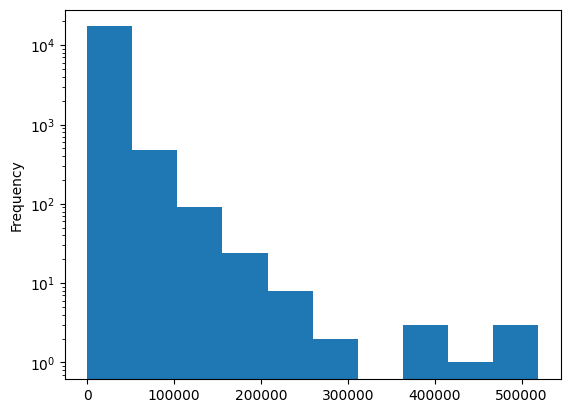

In [78]:
df["precio"].plot(kind="hist")
plt.yscale("log")
plt.show()

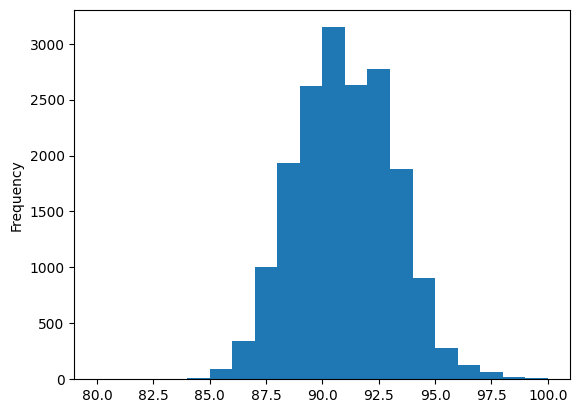

In [85]:
df["puntaje"].plot(kind="hist",bins=np.arange(80,101))
plt.show()

In [103]:
df["puntaje"].value_counts().sort_index()

puntaje
82        1
84       11
85       90
86      340
87     1005
88     1932
89     2623
90     3147
91     2633
92     2770
93     1877
94      905
95      278
96      129
97       64
98       18
99        6
100       2
Name: count, dtype: int64

In [104]:
df["tipo"].value_counts()

tipo
Tinto                9074
Blanco               3347
Ensamblaje Tinto     3088
Espumoso             1399
Rosado                386
Ensamblaje Blanco     254
Dulce                 163
Naranjo                96
Cosecha Tardía          7
Jerez                   6
Sin Informacion         5
Rose                    5
Name: count, dtype: int64

In [105]:
df["cepa"].value_counts()

cepa
Sin Informacion       4317
Cabernet Sauvignon    2460
Carmenere             1962
Syrah                 1544
Sauvignon Blanc       1543
                      ... 
Gamay                    1
Listan Negro             1
Furmint                  1
Sauvignon Vert           1
Aglianico                1
Name: count, Length: 115, dtype: int64

In [107]:
df["nota_cata"].iloc[67]

'Rojo cereza oscuro, brillante. Aromas frutales, rojos, especiados, de fondos tostados. Boca jugosa, tersa, de acidez presente, larga.'

In [109]:
df["nota_cata"].apply(len).sort_values()

265       53
10067     57
9070      59
6053      60
175       60
        ... 
4040     439
11747    447
8181     447
8292     449
3179     527
Name: nota_cata, Length: 17831, dtype: int64